In [75]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import tweepy

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, consumer_secret,
                   access_token, access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [69]:
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

sentiments = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

oldest_tweet = ""
i = 0
counter = 1

for target in target_terms:
    i+=1

    public_tweets = api.user_timeline(target, count=100)

    for tweet in public_tweets:
        text=tweet["text"]

        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        sentiments.append({"User": target,
                           "text":text,
                       "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Tweets Ago": counter})
    counter+=1

sentiments_pd = pd.DataFrame.from_dict(sentiments)

sentiments_pd.to_csv("/Users/williampappas/Desktop/API/Homework/Sentiments.csv")
sentiments_pd.head()

,User,text,Date,Compound,Positive,Negative,Neutral,Tweets Ago
0,@BBC,It's the clash of the tennis titans 🎾👊@Andy_Mu...,Fri Nov 13 22:18:26 +0000 2020,0.0000,0.000,1.000,0.000,1
1,@BBC,RT @BBCRadio2: The official video for this yea...,Fri Nov 13 21:00:12 +0000 2020,-0.1007,0.141,0.671,0.188,1
2,@BBC,Thanks for the exclusive performance for @bbcc...,Fri Nov 13 20:33:26 +0000 2020,0.5267,0.286,0.714,0.000,1
3,@BBC,It's time for #ChildrenInNeed 2020!\n\nStartin...,Fri Nov 13 19:00:01 +0000 2020,0.0000,0.000,1.000,0.000,1
4,@BBC,RT @bbcasiannetwork: Looking for the ultimate ...,Fri Nov 13 18:02:03 +0000 2020,0.4019,0.144,0.856,0.000,1


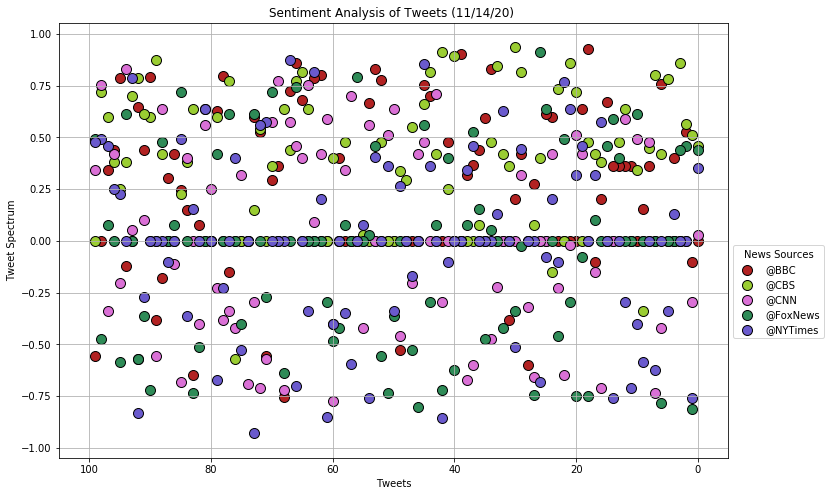

<Figure size 432x288 with 0 Axes>

In [82]:
colors = ["firebrick","yellowgreen","orchid","seagreen","slateblue"]
user=sentiments_pd["User"].unique()

i=0
plt.figure(figsize=(12,8))
for channel in target_terms:
    tweet_ago = np.arange(len(sentiments_pd[sentiments_pd['User']==channel]['Compound']))
    plt.scatter(tweet_ago, sentiments_pd[sentiments_pd['User']==channel]['Compound'],  marker ='o', color=colors[i], s=100,edgecolor="black", label = channel)
    i+=1
plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.ylabel("Tweet Spectrum")
plt.xlabel("Tweets")
plt.xlim(105,-5)
plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), title = 'News Sources', frameon=True)
plt.grid(True)
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/Sentiment Scatter.png")

In [72]:
#Collect the compound values for each news source
sentiments = sentiments_pd.pivot_table(index='User',  values="Compound", aggfunc=np.mean)
sentiments

,Compound
User,
@BBC,0.231165
@CBS,0.330341
@CNN,0.013569
@FoxNews,-0.027238
@NYTimes,0.002331


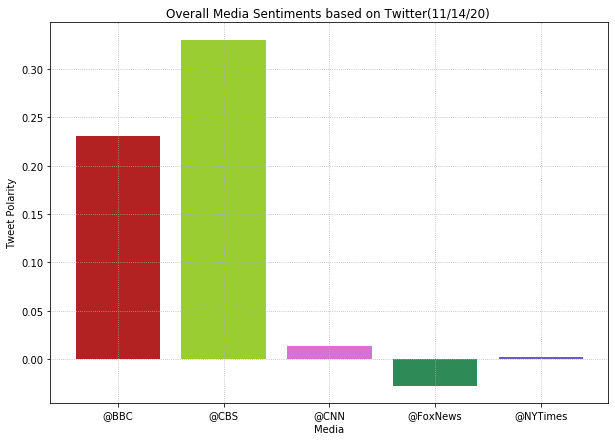

<Figure size 432x288 with 0 Axes>

In [83]:
#Plot
x_axis = np.arange(len(sentiments.index.values))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, sentiments.index.values, rotation="horizontal")

plot=plt.bar(sentiments.index.values, sentiments["Compound"], color=colors, alpha=1, align="edge")
plt.grid()

#plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.title("Overall Media Sentiments based on Twitter(%s) " % (time.strftime("%x")))
plt.xlabel("Media")
plt.ylabel("Tweet Polarity")
ax.grid(linestyle="dotted")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/Sentiment Bar.png")

**Observations**

* BBC and CBS tweets are consistently positive.
* CBS has the highest positive score, FoxNews has the lowest positive score (essentially negative).
* A majority of tweets, as shown in the Scatter, are neutral.